# Housing price prediction using ML models and DP 

# Problem Statement and Requirements

Problem Statement : -
    
Consider a customer who is planning to buy a house based on certain parameters. 

The dataset has 546 rows and 12 columns containing the prices of properties in a specific region. 

It wishes to use the data to optimise the house of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the customer wants —

a. To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

b. To create a regression model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

c. To know the accuracy of the model, i.e. how well these variables can predict house prices.

# Exploratory Data Analysis in Python

Exploratory Data Analysis in Python

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:
– main features of data
– variables and relationships that hold between them
– identifying which variables are important for our problem

We shall look at various exploratory data analysis methods like:
1. Descriptive Statistics, which is a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample
2. Correlation and correlation methods
3. Graphs and Charts

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
ds=pd.read_csv('F:\Analytics\Learnings\Python\Pratice data\Housing_Data.csv')
ds.head(3)

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no


In [7]:
# Dropping the unwanted columns 

In [8]:
ds=ds.drop(columns=['Unnamed: 0'])

In [9]:
ds.tail(10)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
536,82500.0,6000,3,2,4,yes,no,no,no,yes,0,no
537,83000.0,4800,3,1,3,yes,no,no,no,yes,0,no
538,84000.0,6500,3,2,3,yes,no,no,no,yes,0,no
539,85000.0,7320,4,2,2,yes,no,no,no,no,0,no
540,85000.0,6525,3,2,4,yes,no,no,no,no,1,no
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,1,2,yes,no,no,no,yes,1,no


In [6]:
# 'Shape' function - Returns the shape (Rows, columns) of dataframe/series

In [7]:
ds.shape

(546, 12)

Inference- We have 546 rows an 13 columns

In [8]:
#  'Size' function - Returns size of dataframe/series which is equivalent to total number of elements. That is rows x columns

In [9]:
ds.size

6552

Inference- We have 546 muliply 13 data elements

In [ ]:
# 'dtypes' function - find out the data type (dtype) of each column in the given dataframe.

In [8]:
ds.dtypes

Unnamed: 0      int64
price         float64
lotsize         int64
bedrooms        int64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object

Inference- The variables or features like price, driveway, recroom, full base, gashw, airco, prefarea is object type. But python do not take objects. So we need convert it to binary format.  

In [ ]:
 # info() function - Print information and summary

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       543 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


Inference- The variables or features like price, driveway, recroom, full base, gashw, airco, prefarea is object type. But python do not take objects. So we need convert it to binary format.

In [ ]:
# 'columns' function- find out the column names

In [10]:
ds.columns

Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')

# Null value check in the data set

In [ ]:
#'isnull()' function -Check the null value in the data set

In [57]:
ds.isnull().sum()

price       3
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

Inference- There are three null value in this data set

In [28]:
ds[(ds["price"].isnull())]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
5,NaN,4160,3,1,1,yes,yes,yes,no,yes,0,no
10,NaN,7200,3,2,1,yes,no,yes,no,yes,3,no
46,NaN,3040,2,1,1,no,no,no,no,no,0,no


In [13]:
#'investigate the null values
ds[(ds["price"].isnull())]

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
5,6,NaN,4160,3,1,1,yes,yes,yes,no,yes,0,no
10,11,NaN,7200,3,2,1,yes,no,yes,no,yes,3,no
46,47,NaN,3040,2,1,1,no,no,no,no,no,0,no


In [20]:
#'drop null values
# Input can be 0-row or 1 -column; inplace: It is a boolean which makes the changes in data frame itself if True
# ds.dropna (axis=0,inplace=True)
ds.shape

(546, 13)

In [14]:
ds[(ds["price"].isnull())]

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
5,6,NaN,4160,3,1,1,yes,yes,yes,no,yes,0,no
10,11,NaN,7200,3,2,1,yes,no,yes,no,yes,3,no
46,47,NaN,3040,2,1,1,no,no,no,no,no,0,no


In [43]:
ds.tail(10)

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
536,537,82500.0,6000,3,2,4,yes,no,no,no,yes,0,no
537,538,83000.0,4800,3,1,3,yes,no,no,no,yes,0,no
538,539,84000.0,6500,3,2,3,yes,no,no,no,yes,0,no
539,540,85000.0,7320,4,2,2,yes,no,no,no,no,0,no
540,541,85000.0,6525,3,2,4,yes,no,no,no,no,1,no
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no
545,546,105000.0,6000,3,1,2,yes,no,no,no,yes,1,no


In [38]:
ds["stories"].value_counts()

2    238
1    227
4     41
3     40
Name: stories, dtype: int64

In [50]:
dp=ds[(ds["bedrooms"]==3) & (ds["bathrms"]==1)]

# Treatment of null values

In [3]:
ds[(ds["price"].isnull())]

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
5,6,NaN,4160,3,1,1,yes,yes,yes,no,yes,0,no
10,11,NaN,7200,3,2,1,yes,no,yes,no,yes,3,no
46,47,NaN,3040,2,1,1,no,no,no,no,no,0,no


In [49]:
ds[(ds.price.isnull())]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea


In [33]:
# find the median, mean and mode of price variable
mean=ds["price"].mean()
mode=ds["price"].mode()
median=ds["price"].median()
print("Mean is -",round(mean,0))
print("Median is -",round(median,0))
print("Mode is-",round(mode,0))

Mean is - 68135.0
Median is - 62000.0
Mode is- 0    50000.0
1    60000.0
dtype: float64


In [10]:
ds.price=ds.price.fillna(60000) # using median value to fill the mising values

In [49]:
ds.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [ ]:
#sort values of a column

Syntax for sort_values

DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind=’quicksort’, na_position=’last’)

1. by: Single/List of column names to sort Data Frame by.
2. axis: 0 or ‘index’ for rows and 1 or ‘columns’ for Column.
3. ascending: Boolean value which sorts Data frame in ascending order if True.
4. inplace: Boolean value. Makes the changes in passed data frame itself if True.
5. kind: String which can have three inputs(‘quicksort’, ‘mergesort’ or ‘heapsort’) of algorithm used to sort data frame.
6. na_position: Takes two string input ‘last’ or ‘first’ to set position of Null values. Default is ‘last’.

In [19]:
ds.sort_values(["price","lotsize"],ascending=[True,False],inplace=False)
ds.head(10) 

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
5,6,60000.0,4160,3,1,1,yes,yes,yes,no,yes,0,no
6,7,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
7,8,69000.0,4160,3,1,3,yes,no,no,no,no,0,no
8,9,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
9,10,88500.0,5500,3,2,4,yes,yes,no,no,yes,1,no


Inference- The price column is sorted first in Ascending order and then the lotsize are sorted in descending order for every price

# Descriptive Statistics

Descriptive Statistics

Descriptive statistics is a helpful way to understand characteristics of your data and to get a quick summary of it. Pandas in python provide an interesting method describe(). The describe function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of distribution of data.

In [20]:
ds.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68090.461538,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26667.555480,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49500.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [22]:
ds["price"].describe()

count       546.000000
mean      68090.461538
std       26667.555480
min       25000.000000
25%       49500.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64

In [44]:
ds.price.describe()

count       546.000000
mean      68121.597070
std       26702.670926
min       25000.000000
25%       49125.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64

In [ ]:
# 'value_counts()' function -Used to get the count of each category in a categorical attributed series of values

In [23]:
ds['bedrooms'].value_counts()

3    301
2    136
4     95
5     10
1      2
6      2
Name: bedrooms, dtype: int64

Inference- We have 301 three bedrooms, 136 bedrooms, 95 four bedrooms,etc

In [ ]:
# Find out how many houses are there with 3 bedrooms and 2 bathrooms

In [111]:
ds [(ds['bedrooms']==3) & (ds['bathrms'] ==2)].value_counts()

price     lotsize  bedrooms  bathrms  stories  driveway  recroom  fullbase  gashw  airco  garagepl  prefarea
49000.0   1950     3         2        2        yes       no       yes       no     no     0         yes         1
98500.0   7700     3         2        1        yes       no       no        no     no     2         no          1
106000.0  7440     3         2        1        yes       yes      yes       no     yes    0         yes         1
105000.0  6000     3         2        2        yes       yes      no        no     yes    1         no          1
          5150     3         2        4        yes       no       no        no     yes    2         no          1
                                                                                                               ..
79000.0   6100     3         2        1        yes       no       yes       no     no     2         yes         1
          3650     3         2        2        yes       no       no        no     no     2  

Inference- We have 72 observations meeting this criteria

In [112]:
# Find out how many houses are there with 3 bedrooms, 2 bathrooms, recroom and air conditioning 

In [113]:
ds [(ds["bedrooms"]==3) & (ds["bathrms"]==2) & (ds["recroom"]=="yes") & (ds["airco"]=="yes")].value_counts()

price     lotsize  bedrooms  bathrms  stories  driveway  recroom  fullbase  gashw  airco  garagepl  prefarea
78000.0   3150     3         2        1        yes       yes      yes       no     yes    0         no          1
88500.0   5500     3         2        4        yes       yes      no        no     yes    1         no          1
          6350     3         2        3        yes       yes      no        no     yes    0         no          1
91500.0   4800     3         2        4        yes       yes      no        no     yes    0         no          1
95000.0   6000     3         2        3        yes       yes      no        no     yes    0         no          1
103000.0  6000     3         2        4        yes       yes      no        no     yes    1         no          1
105000.0  6000     3         2        2        yes       yes      no        no     yes    1         no          1
106000.0  7440     3         2        1        yes       yes      yes       no     yes    0  

In [114]:
# Find out how many houses are there with 3 bedrooms, 2 bathrooms and air conditioning 

In [115]:
ds [(ds['bedrooms']==3) & (ds['bathrms'] ==2)].airco.value_counts()

yes    42
no     30
Name: airco, dtype: int64

Inference- We have 42 observations meeting this criteria

In [116]:
# Find out how many houses are there with greater than 3 stories and has recreation room 

In [117]:
ds [ (ds['stories']>=3)  &  (ds['recroom']=='yes') ].value_counts()

price     lotsize  bedrooms  bathrms  stories  driveway  recroom  fullbase  gashw  airco  garagepl  prefarea
78000.0   6100     3         1        3        yes       yes      no        no     yes    0         yes         1
          6210     4         1        4        yes       yes      no        no     yes    0         no          1
83000.0   5828     4         1        4        yes       yes      no        no     no     0         no          1
83900.0   5500     3         1        3        yes       yes      no        no     yes    1         no          1
88500.0   5500     3         2        4        yes       yes      no        no     yes    1         no          1
          6350     3         2        3        yes       yes      no        no     yes    0         no          1
89500.0   6000     4         1        3        yes       yes      yes       no     no     0         yes         1
91500.0   4800     3         2        4        yes       yes      no        no     yes    0  

In [118]:
# Row and column slection using iloc and loc function

In [119]:
ds.iloc[ : , :  ]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [120]:
ds.iloc[[1,3,4],[2]]

,bedrooms
1,2
3,3
4,2


In [121]:
ds.iloc[[1,3,4],[2,4]]

,bedrooms,stories
1,2,1
3,3,2
4,2,1


In [122]:
ds.iloc[[2,7],:]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
7,69000.0,4160,3,1,3,yes,no,no,no,no,0,no


In [123]:
ds.iloc[:,2:5]

,bedrooms,bathrms,stories
0,3,1,2
1,2,1,1
2,3,1,1
3,3,1,2
4,2,1,1
...,...,...,...
541,3,2,4
542,3,2,4
543,3,2,4
544,3,2,2


In [124]:
# Row and column selection using locator function

In [125]:
ds.loc[[1,3,4],['lotsize']]

,lotsize
1,4000
3,6650
4,6360


# Data analysis using Graphs and Charts

In [126]:
import matplotlib.pyplot as plt

In [127]:
ds.stories.value_counts()

2    238
1    227
4     41
3     40
Name: stories, dtype: int64

In [128]:
# Show scatter plot of price vs. lotsize

Syntax is 
matplotlib.pyplot.scatter(x_axis_data, y_axis_data, s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None)

x_axis_data- An array containing x-axis data
y_axis_data- An array containing y-axis data
s- marker size (can be scalar or array of size equal to size of x or y)
c- color of sequence of colors for markers
marker- marker style
cmap- cmap name
linewidths- width of marker border
edgecolor- marker border color
alpha- blending value, between 0 (transparent) and 1 (opaque)

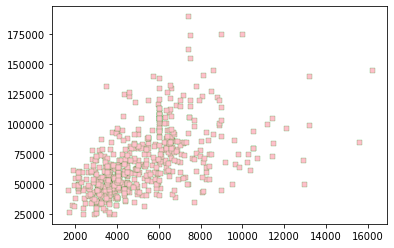

In [129]:
p=ds.lotsize
q=ds.price
plt.scatter(p, q, c ="pink", marker ="s", edgecolor ="green", linewidths = 0.2, s = 25)
plt.show()

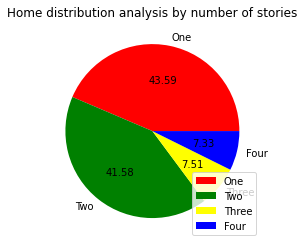

In [130]:
# Show pie chart on houses by number of stories
plt.pie(ds.stories.value_counts(),colors= ["red","green",'yellow','blue'],labels=["One","Two","Three","Four"],autopct = "%0.2f")
plt.title("Home distribution analysis by number of stories")
plt.legend(loc="lower right")
plt.show()

In [5]:
m=ds.stories.value_counts()
m

2    238
1    227
4     41
3     40
Name: stories, dtype: int64

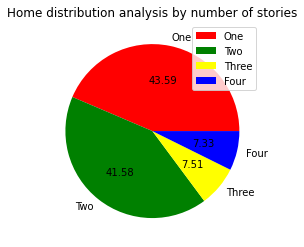

In [132]:
m=ds.stories.value_counts()
plt.pie(m,colors= ["red","green",'yellow','blue'],labels=["One","Two","Three","Four"],autopct = "%0.2f")
plt.title("Home distribution analysis by number of stories")
plt.legend(loc="upper right")
plt.show()

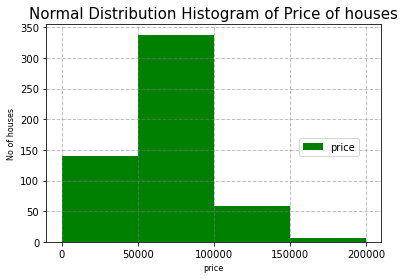

In [133]:
# Show histogram to show price ranges- Histograms are used to chart continuous data  
plt.hist(ds["price"],bins=[0,50000,100000,150000,200000],histtype='bar',color='green')
plt.grid(color ='grey', linestyle ='-.', linewidth = 0.5)   # Add x, y gridlines 
plt.xticks([0,50000,100000,150000,200000]) # Adding x ticks
plt.title('Normal Distribution Histogram of Price of houses',fontsize=15) # Adding title 
plt.xlabel("price",fontsize=8) # Adding x title 
plt.ylabel("No of houses",fontsize=8) # Adding  y title
plt.legend(["price"],loc="upper right",bbox_to_anchor=(0.95,0.5))
plt.show()

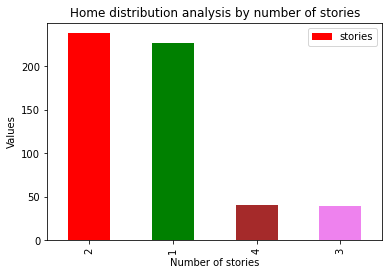

In [134]:
# Show Vertical Bar graph on houses by number of stories 
m.plot(kind="bar",title="Home distribution analysis by number of stories",color=["Red","Green",'Brown','Violet'])
plt.xlabel("Number of stories")
plt.ylabel("Values")
plt.legend()
plt.show()

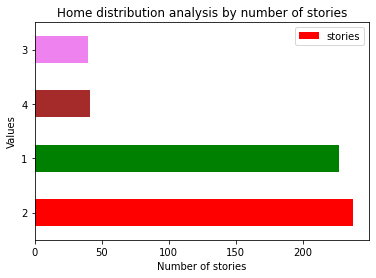

In [135]:
# Show horizontal Bar graph on houses by number of stories 
m.plot(kind="barh",title="Home distribution analysis by number of stories",color=["Red","Green",'Brown','Violet'])
plt.xlabel("Number of stories")
plt.ylabel("Values")
plt.legend()
plt.show()

In [136]:
#  Boxplot plots- Single, Multiple, Gropby

In [137]:
#  Boxplot of  price 

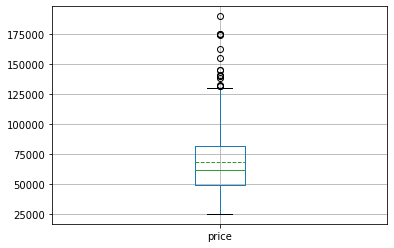

In [138]:
ds.boxplot(column=["price"],meanline=True,showmeans=True)

plt.show()

In [139]:
#  Boxplot of price, lotsize,bedrooms

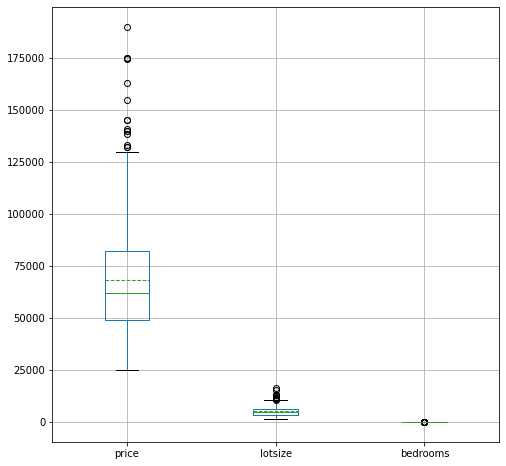

In [140]:
plt.figure(figsize=(8,8))
ds.boxplot(column=["price","lotsize","bedrooms"],meanline=True,showmeans=True)
plt.show()

In [141]:
# Boxplot of bedrooms with respect to price

<Figure size 864x864 with 0 Axes>

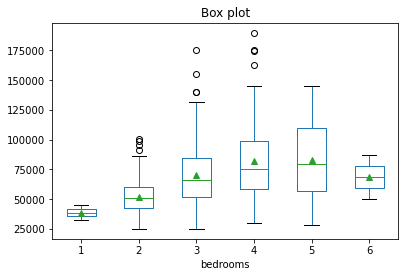

In [142]:
plt.figure(figsize=(12,12))
ds.boxplot(by ='bedrooms', column =['price'], grid = False,showmeans=True)
plt.title('Box plot') #  helps to remove titles
plt.suptitle('')#  helps to remove titles
plt.show()

In [143]:
# Prepare a subplot for selection of a airconditioned house with 2 criteria - 1. 3BR, 1 storied 2. 3 BR 2 storied

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

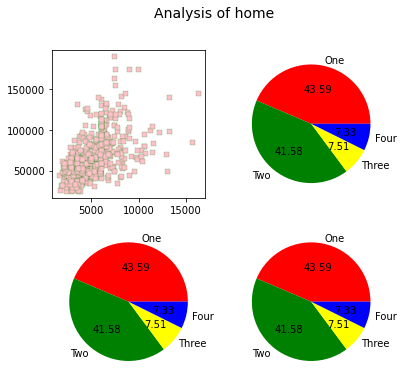

In [145]:

plt. figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.scatter(p, q, c ="pink", marker ="s", edgecolor ="green", linewidths = 0.2, s = 25)

plt.subplot(2,2,2)
plt.pie(ds.stories.value_counts(),colors= ["red","green",'yellow','blue'],labels=["One","Two","Three","Four"],autopct = "%0.2f")

plt.subplot(2,2,3)
plt.pie(ds.stories.value_counts(),colors= ["red","green",'yellow','blue'],labels=["One","Two","Three","Four"],autopct = "%0.2f")

plt.subplot(2,2,4)
plt.pie(ds.stories.value_counts(),colors= ["red","green",'yellow','blue'],labels=["One","Two","Three","Four"],autopct = "%0.2f")


plt.suptitle("Analysis of home", fontsize=14)
plt.show()

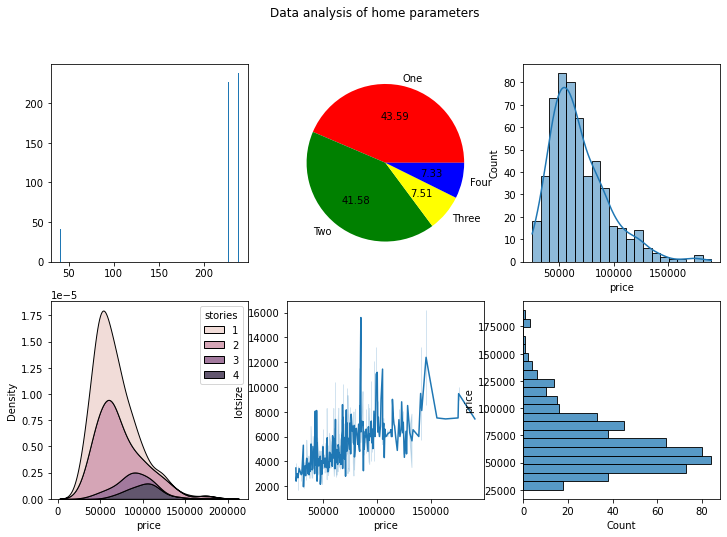

In [8]:

plt.figure(figsize=(12,8))


plt.subplot(2,3,1)
plt.bar(m,m)


plt.subplot(2,3,2)
plt.pie(m,colors= ["red","green",'yellow','blue'],labels=["One","Two","Three","Four"],autopct = "%0.2f")


plt.subplot(2,3,3)
sns.histplot(ds["price"],kde=True)


plt.subplot(2,3,4)
sns.kdeplot( data=ds, x="price",hue="stories",multiple='stack')

plt.subplot(2,3,5)
sns.lineplot(x='price',y='lotsize',data=ds)

plt.subplot(2,3,6)
sns.histplot(data=ds,y="price")


plt.suptitle("Data analysis of home parameters",fontsize=12)   # Super title to the entire figure with the suptitle() function
plt.show()

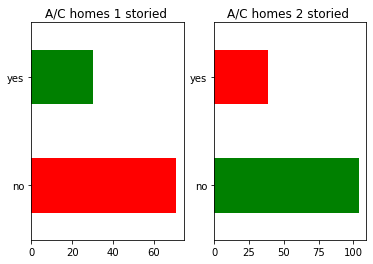

In [91]:
%matplotlib inline

fig,axs = plt.subplots(1,2)

ds[(ds["stories"]==1) & (ds['bedrooms']==3)].airco.value_counts().plot(kind="barh",ax=axs[0],color=["Red","Green"],title="A/C homes 1 storied ")

ds[(ds["stories"]==2) & (ds['bedrooms']==3)].airco.value_counts().plot(kind="barh",ax=axs[1],color=["Green","Red"],title="A/C homes 2 storied ")

plt.show()

# Graphs using Seaborn

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

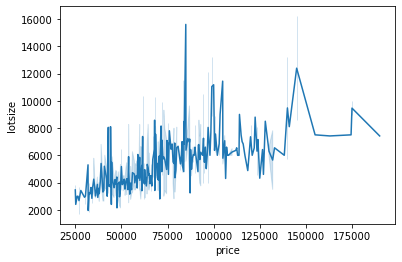

In [9]:
sns.lineplot(x='price',y='lotsize',data=ds)
plt.show()

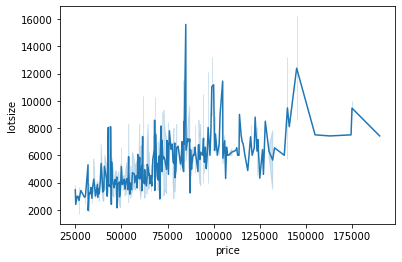

In [10]:
sns.lineplot(ds['price'],ds['lotsize'],data=ds)
plt.show()

KDE distribution - Probabality distribution curve

In [14]:
import seaborn as sns

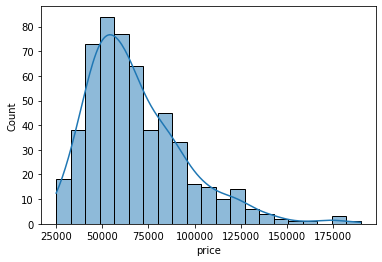

In [25]:
sns.histplot(ds["price"],kde=True)
plt.show()

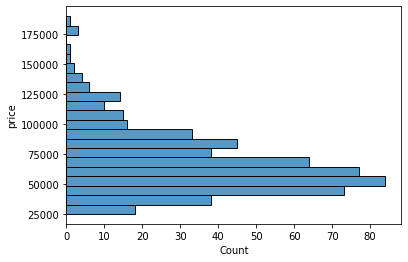

In [26]:
sns.histplot(data=ds,y="price")
plt.show()

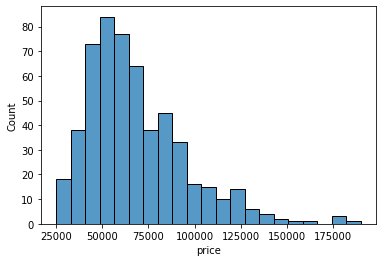

In [27]:
sns.histplot(data=ds,x="price")
plt.show()

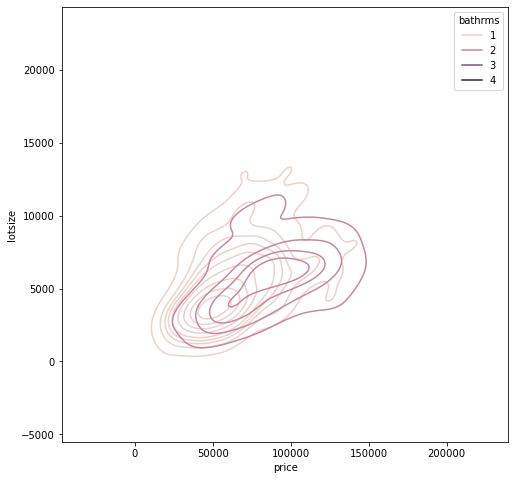

In [11]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=ds,x="price",y="lotsize",hue="bathrms")
plt.show()

KDE -Univariate distribution along the x axis

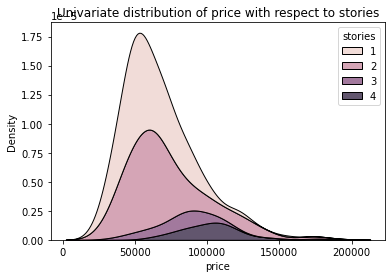

In [26]:
sns.kdeplot( data=ds, x="price",hue="stories",multiple="stack")
plt.title('Univariate distribution of price with respect to stories')
plt.show()

KDE -Bivariate distribution 

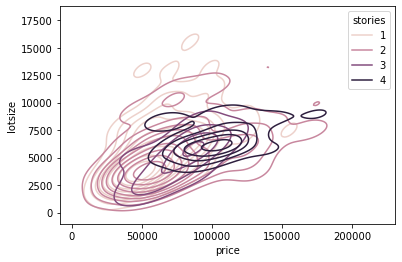

In [28]:
sns.kdeplot( data=ds, x="price", y="lotsize", hue='stories',multiple="layer")
plt.show()

Jointplot distribution 

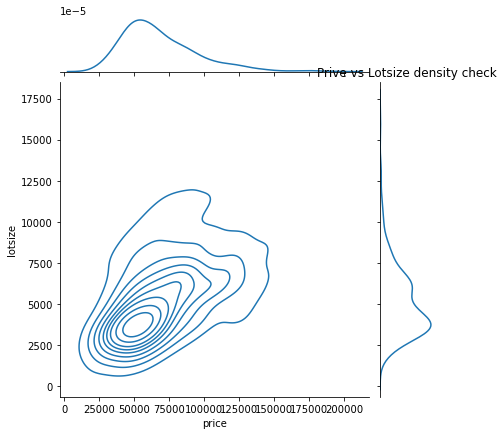

In [76]:
sns.jointplot(x ='price', y ='lotsize', data = ds, kind ='kde')
plt.show()

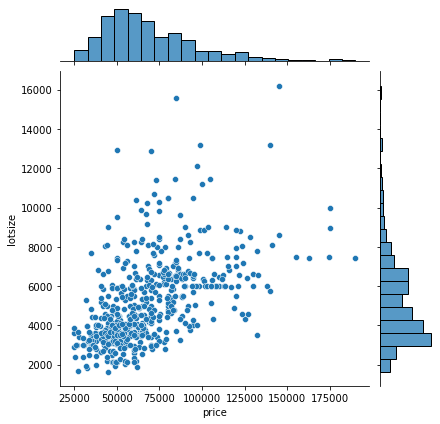

In [88]:
sns.jointplot(x ='price', y ='lotsize', data = ds, kind ='scatter')
plt.show()

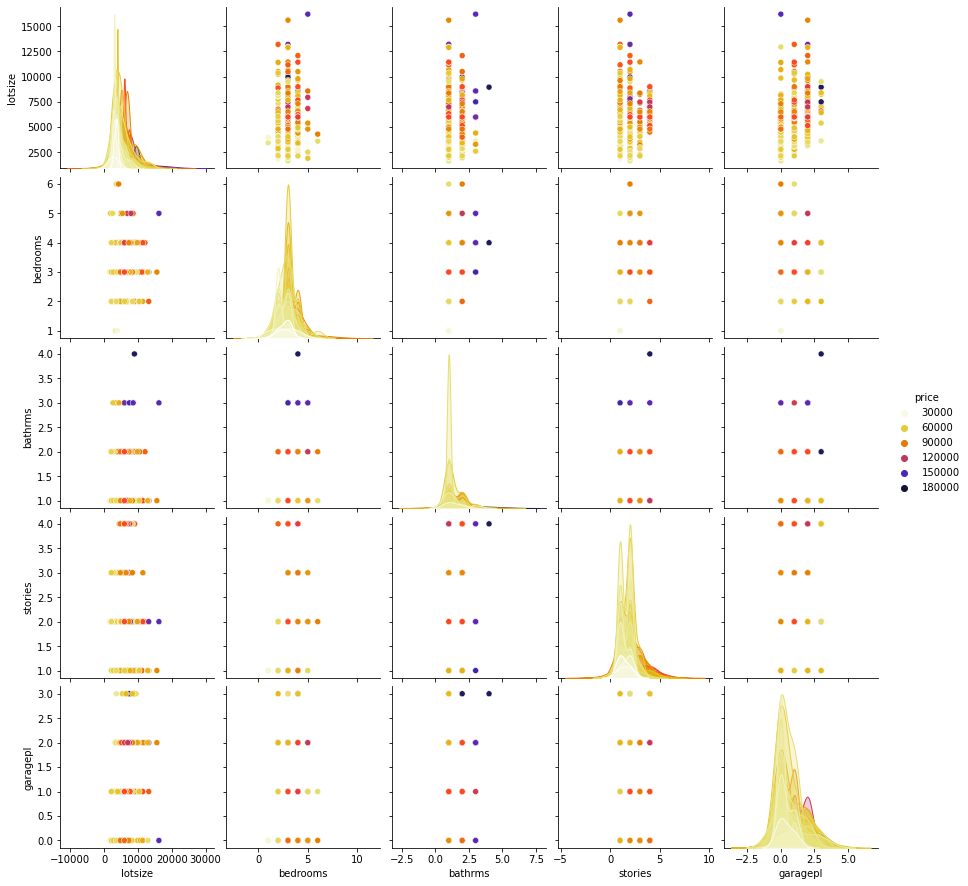

In [15]:
sns.pairplot(ds,hue='price',palette='CMRmap_r')
plt.show()

# Measures of Central Tendancy

In [37]:
# 'Mean median and mode of a variable

In [24]:
mean= ds["price"].mean()
median=ds["price"].median()
mode=ds["price"].mode()
print("Mean is -",round(mean,2))
print("Median is -",median)
print("Mode is -\n", mode)

Mean is - 68090.46
Median is - 62000.0
Mode is -
 0    60000.0
dtype: float64


# Measures of dispersion and Outlier detection

In [ ]:
# Outside detection using SD

In [53]:
import seaborn as sn

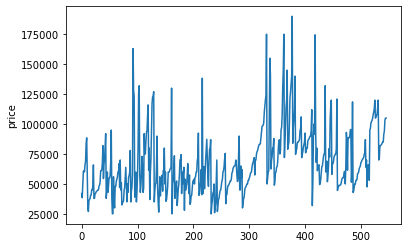

In [56]:
sn.lineplot(data=ds.price)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

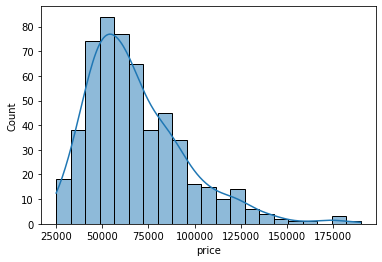

In [4]:
sn.histplot(ds.price,kde=True)

In [ ]:
# 'Mean of the variable 'price'

In [34]:
ds.shape

(546, 12)

In [80]:
mean= ds["price"].mean()
mean 

68090.46153846153

In [81]:
# Standard deviation of the variable 'price'

In [82]:
std_dev= ds["price"].std()
std_dev

26667.555480368228

In [83]:
# Outlier detection variable 'price'

In [84]:
lower_limit= mean-3*std_dev
lower_limit

-11912.204902643149

In [85]:
upper_limit= mean + 3*std_dev
upper_limit

148093.12797956623

In [86]:
mean1= ds["lotsize"].mean()
mean1

5150.2655677655675

In [93]:
std_dev1= ds["lotsize"].std()
std_dev1

2168.1587252285567

In [94]:
lower_limit_1= mean1-1.5*std_dev1
lower_limit_1

-1354.2106079201021

In [95]:
upper_limit_1= mean1 + 3*std_dev1
upper_limit_1

11654.741743451237

In [37]:
ds[ (ds["lotsize"]<-1347) | (ds["lotsize"]>11581) ]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
358,97000.0,12090,4,2,2,yes,no,no,no,no,2,yes
364,84900.0,15600,3,1,1,yes,no,no,no,yes,2,no
365,99000.0,13200,2,1,1,yes,no,yes,yes,no,1,no
368,145000.0,16200,5,3,2,yes,no,no,no,no,0,no
382,140000.0,13200,3,1,2,yes,no,yes,no,yes,2,yes
490,50000.0,12944,3,1,1,yes,no,no,no,no,0,no
532,70000.0,12900,3,1,1,yes,no,no,no,no,2,no


In [38]:
ds= ds[(ds["lotsize"]>(-1347)) &(ds["lotsize"]<(11581))]

In [39]:
ds[ (ds["lotsize"]<-1347) | (ds["lotsize"]>11581) ]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea


In [13]:
ds[ (ds["price"]<-12068) | (ds["price"]>148338) ]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
92,163000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no
331,175000.0,8960,4,4,4,yes,no,no,no,yes,3,no
337,155000.0,7500,3,3,1,yes,no,yes,no,yes,2,yes
362,175000.0,9960,3,2,2,yes,no,yes,no,no,2,yes
377,190000.0,7420,4,2,3,yes,no,no,no,yes,2,yes
418,174500.0,7500,4,2,2,yes,no,yes,no,yes,3,yes


Inference- There are no 6 outliers

In [48]:
# removal of outliers

In [11]:
ds= ds[(ds["price"]>(-12068)) &(ds["price"]<(148338))]

In [12]:
ds.shape

(540, 12)

In [13]:
ds.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no


In [14]:
ds[ (ds["price"]<-12068) | (ds["price"]>148338) ]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea


# Feature encoding 

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
ds["driveway"]=LabelEncoder().fit_transform(ds["driveway"])
ds["recroom"]=LabelEncoder().fit_transform(ds["recroom"])
ds["fullbase"]=LabelEncoder().fit_transform(ds["fullbase"])
ds["gashw"]=LabelEncoder().fit_transform(ds["gashw"])
ds["gashw"]=LabelEncoder().fit_transform(ds["gashw"])
ds["airco"]=LabelEncoder().fit_transform(ds["airco"])
ds["prefarea"]=LabelEncoder().fit_transform(ds["prefarea"])

In [12]:
ds.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0


# Correlation - Partial and Multiple

In [156]:
# Partial anbd Multiple correlation

In [157]:
ds.corr()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000000,0.527176,0.356841,0.488742,0.435420,0.304164,0.286537,0.174868,0.112542,0.449239,0.334131,0.316420
lotsize,0.527176,1.000000,0.139478,0.164985,0.073932,0.283631,0.147522,0.035898,-0.006121,0.211556,0.331124,0.225073
bedrooms,0.356841,0.139478,1.000000,0.372681,0.402718,-0.022593,0.078822,0.093564,0.048311,0.146681,0.119585,0.072502
bathrms,0.488742,0.164985,0.372681,1.000000,0.319187,0.031084,0.151812,0.100467,0.076219,0.163511,0.129364,0.046351
stories,0.435420,0.073932,0.402718,0.319187,1.000000,0.119077,0.047378,-0.168384,0.018818,0.298813,0.030476,0.040941
driveway,0.304164,0.283631,-0.022593,0.031084,0.119077,1.000000,0.090234,0.035779,-0.011711,0.098189,0.197376,0.197126
recroom,0.286537,0.147522,0.078822,0.151812,0.047378,0.090234,1.000000,0.372490,-0.009791,0.133405,0.047179,0.174436
fullbase,0.174868,0.035898,0.093564,0.100467,-0.168384,0.035779,0.372490,1.000000,0.007204,0.032324,0.035544,0.225788
gashw,0.112542,-0.006121,0.048311,0.076219,0.018818,-0.011711,-0.009791,0.007204,1.000000,-0.128683,0.075554,-0.058157
airco,0.449239,0.211556,0.146681,0.163511,0.298813,0.098189,0.133405,0.032324,-0.128683,1.000000,0.131226,0.111574


In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
# cmap= Dark2, Greens, Blues, Greys, Accent, GnBu

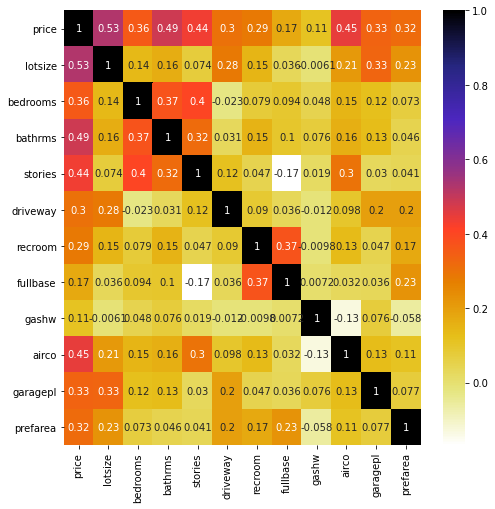

In [160]:
plt.figure(figsize=(8,8))
sns.heatmap(ds.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [161]:
corr=ds.corr().price.sort_values()
corr

gashw       0.112542
fullbase    0.174868
recroom     0.286537
driveway    0.304164
prefarea    0.316420
garagepl    0.334131
bedrooms    0.356841
stories     0.435420
airco       0.449239
bathrms     0.488742
lotsize     0.527176
price       1.000000
Name: price, dtype: float64

In [162]:
# Correlation between two variables in the dataframe

In [163]:
ds.price.corr(ds.lotsize) # Method 1

0.5271761177429012

In [164]:
ds['price'].corr(ds["lotsize"]).round(2) # Method 2 and rounding the decimals 

0.53

In [165]:
# Correlation of a single variable and sorting the values

Syntax for sort_values

DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind=’quicksort’, na_position=’last’)

1. by: Single/List of column names to sort Data Frame by.
2. axis: 0 or ‘index’ for rows and 1 or ‘columns’ for Column.
3. ascending: Boolean value which sorts Data frame in ascending order if True.
4. inplace: Boolean value. Makes the changes in passed data frame itself if True.
5. kind: String which can have three inputs(‘quicksort’, ‘mergesort’ or ‘heapsort’) of algorithm used to sort data frame.
6. na_position: Takes two string input ‘last’ or ‘first’ to set position of Null values. Default is ‘last’.

In [166]:
ds.corr().lotsize.sort_values(ascending=True)

gashw      -0.006121
fullbase    0.035898
stories     0.073932
bedrooms    0.139478
recroom     0.147522
bathrms     0.164985
airco       0.211556
prefarea    0.225073
driveway    0.283631
garagepl    0.331124
price       0.527176
lotsize     1.000000
Name: lotsize, dtype: float64

In [167]:
# Partial correlation

In [21]:
cr=ds.corr().price
cr.sort_values()

gashw         0.112851
fullbase      0.173060
recroom       0.284480
driveway      0.303168
prefarea      0.316952
garagepl      0.330702
bedrooms      0.356825
Unnamed: 0    0.401484
stories       0.435748
airco         0.445879
bathrms       0.487115
lotsize       0.526282
price         1.000000
Name: price, dtype: float64

Based on correlation matrix above, we can put cut off value at 0.35 and move with feature selection for mutiple regression machine learning

1. Y = Price 
2. X = lotsize,bathrms,airco,stories,bedrooms


In [169]:
cr1=ds.corr().price

# 1.  Multiple Linear Regression

In [17]:
x1=ds.iloc[:,[1,2,3,4,9]] # using lotsize as Y variable 
x1

,lotsize,bedrooms,bathrms,stories,airco
0,5850,3,1,2,0
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0
...,...,...,...,...,...
541,4800,3,2,4,1
542,6000,3,2,4,1
543,6000,3,2,4,1
544,6000,3,2,2,1


In [18]:
y1=ds.iloc[:,0] # using price as Y variable 
y1

0       42000.0
1       38500.0
2       49500.0
3       60500.0
4       61000.0
         ...   
541     91500.0
542     94000.0
543    103000.0
544    105000.0
545    105000.0
Name: price, Length: 540, dtype: float64

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
xnew = sc.fit_transform(x1)
xnew

array([[ 0.340413  ,  0.05791944, -0.56865903,  0.22914202, -0.67202151],
       [-0.51897465, -1.30192837, -0.56865903, -0.92727565, -0.67202151],
       [-0.95563649,  0.05791944, -0.56865903, -0.92727565, -0.67202151],
       ...,
       [ 0.41009308,  0.05791944,  1.50617798,  2.54197736,  1.48804762],
       [ 0.41009308,  0.05791944,  1.50617798,  0.22914202,  1.48804762],
       [ 0.41009308,  0.05791944, -0.56865903,  0.22914202,  1.48804762]])

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
from sklearn.model_selection import train_test_split
xnew_train,xnew_test,y1_train,y1_test = train_test_split(xnew,y1,test_size=0.8,random_state=1)

In [29]:
lr.fit(xnew_train,y1_train)

LinearRegression()

In [30]:
y_pred = lr.predict(xnew_test)

In [31]:
lr.score(xnew_train,y1_train)

0.6462122237501664

In [32]:
lr.score(xnew_test,y1_test)

0.5455683970776306

In [33]:
from sklearn.metrics import r2_score
r2_score(y1_test,y_pred)

0.5455683970776306

In [49]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(y1_test,y_pred)

267104731.11886814

In [150]:
# User testing
Lotsize =float(input('Enter the required lotsize -'))
bedrooms=int(input('Enter the required bedrooms -'))
stories =int(input('Enter the number of stories required -'))
bathrooms =int(input('Enter the required no if bathrooms-'))
air=int(input('Do you require aircondition, 1 for yes,, 0 for no -'))

Enter the required lotsize -4000
Enter the required bedrooms -2
Enter the number of stories required -2
Enter the required no if bathroomsb-2
Do you require aircondition, 1 for yes,, 0 for no -1


In [170]:
p={'lotsize':Lotsize,'bedrooms':bedrooms,'stories':stories,'bathrms':bathrooms,'airco':air}
p

{'lotsize': 4000.0, 'bedrooms': 2, 'stories': 2, 'bathrms': 2, 'airco': 1}

In [174]:
x_pred=pd.DataFrame({'lotsize':[Lotsize],'bedrooms':[bedrooms],'stories':[stories],'bathrms':[bathrooms],'airco':[air]})
x_pred

,lotsize,bedrooms,stories,bathrms,airco
0,4000.0,2,2,2,1


In [175]:
x_pred= s.fit_transform(x_pred)
x_pred

array([[0., 0., 0., 0., 0.]])

In [176]:
a=lr.predict(x_pred)
print("Accordint to Multiple linear Rergression model house prices is %0.3f"%(a))

Accordint to Multiple linear Rergression model house prices is 66934.985


# 2.  Decision Tree Regression 

In [20]:
from sklearn.model_selection import train_test_split
xnew_train,xnew_test,y1_train,y1_test = train_test_split(xnew,y1,test_size=0.8,random_state=1)

In [34]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(criterion="mse")

In [35]:
dc.fit(xnew_train,y1_train)

DecisionTreeRegressor()

In [38]:
y_pred=dc.predict(xnew_test)
y_pred1=dc.predict(xnew_train)

In [40]:
from sklearn.metrics import r2_score
r2_score(y1_test,y_pred)

0.08899472800090114

In [39]:
from sklearn.metrics import r2_score
r2_score(y1_train,y_pred1)

0.9992320904214284

# 2.1 Hyper parameter tuning-GridsearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

In [52]:
parms= {"max_depth" :[1,2,4,6,8,10,12],
        "min_samples_split":[2,3,4,6,7,8,9,10,11,12],
        "min_samples_leaf" : [1,2,3,4,5,6]}

In [65]:
gcv=GridSearchCV(estimator=dc,param_grid=parms)
gcv.fit(xnew_train,y1_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=4, min_samples_leaf=2,
                                             min_samples_split=12),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 6, 7, 8, 9, 10, 11,
                                               12]})

In [66]:
gcv.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=12)

In [67]:
dc=DecisionTreeRegressor(criterion="mse",max_depth=2, min_samples_leaf=2, min_samples_split=12)

In [68]:
dc.fit(xnew_train,y1_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=12)

In [62]:
y_pred=dc.predict(xnew_test)

In [63]:
from sklearn.metrics import r2_score
r2_score(y1_test,y_pred)

0.30273927794215827

In [64]:
y_pred1=dc.predict(xnew_train)
r2_score(y1_train,y_pred1)

0.7697568657686067

# 3  RandomForest Regressor

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xnew_train,xnew_test,y1_train,y1_test = train_test_split(xnew,y1,test_size=0.8,random_state=1)

In [31]:
# RandomForestRegressor- Regression model development

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfmodel= RandomForestRegressor(n_estimators = 50,oob_score = True)

In [34]:
rfmodel.fit(xnew_train,y1_train)

RandomForestRegressor(n_estimators=50, oob_score=True)

In [35]:
rf_y_predicted= rfmodel.predict(xnew_test)

In [36]:
# Accuracy test using R square

In [37]:
from sklearn.metrics import r2_score

In [38]:
accuracy=r2_score(y1_test,rf_y_predicted)
accuracy

0.40367119223464587

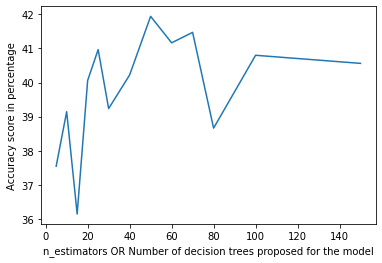

In [39]:
import matplotlib.pyplot as plt

n_estimators=[5,10,15,20,25,30,40,50,60,70,80,100,150]
accu=[]

for i in n_estimators:
    rfmodel= RandomForestRegressor(n_estimators = i,oob_score = True)
    rfmodel.fit(xnew_train,y1_train)
    rf_y_predicted= rfmodel.predict(xnew_test)
    accuracy=r2_score(y1_test,rf_y_predicted)
    accu.append(accuracy*100)
    
plt.plot(n_estimators,accu)
plt.xlabel('n_estimators OR Number of decision trees proposed for the model')
plt.ylabel('Accuracy score in percentage')
plt.show()
    


# 4. Support vector regression

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xnew_train,xnew_test,y1_train,y1_test = train_test_split(xnew,y1,test_size=0.8,random_state=1)

In [29]:
# Model development 

In [30]:
from sklearn.svm import SVR

In [37]:
regressor=SVR(kernel='rbf')

In [38]:
regressor.fit(xnew_train,y1_train)

SVR(kernel='linear')

In [42]:
y_pred=regressor.predict(xnew_test)

In [43]:
from sklearn.metrics import r2_score
r2_score(y1_test,y_pred)

-0.08979751146825254

In [44]:
y_pred1=regressor.predict(xnew_train)
r2_score(y1_train,y_pred1)

-0.02528372354060271

# 4.1 Hyper parameter tuning-GridsearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

# Applying Grid Search to find the best model and the best parameters
params = {'gamma': [0.001,0.01,0.1,1,2,5,10,15,25,50,100,150],
         'C': [0.001,0.01,0.1,1,2,5,10,15,25,50],
          'degree':[3,4,5,6,7,8,10],
          'kernel': ['rbf']}

gcv = GridSearchCV(estimator=regressor,param_grid=params)
gcv.fit(xnew_train,y1_train)

GridSearchCV(estimator=SVR(C=50, gamma=0.1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 25, 50],
                         'degree': [3, 4, 5, 6, 7, 8, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 25, 50,
                                   100, 150],
                         'kernel': ['rbf']})

In [53]:
gcv.best_estimator_

SVR(C=50, gamma=0.1)

In [54]:
regressor=SVR(kernel='rbf',gamma=0.1,C=50)

In [55]:
regressor.fit(xnew_train,y1_train)

SVR(C=50, gamma=0.1)

In [56]:
y_pred=regressor.predict(xnew_test)
r2_score(y1_test,y_pred)

-0.07007640925044711

R 2(coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

# 5. xg boost

In [13]:
from sklearn.model_selection import train_test_split
xnew_train,xnew_test,y1_train,y1_test = train_test_split(xnew,y1,test_size=0.8,random_state=1)

In [14]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1,n_estimators=50,objective='reg:linear', booster='gbtree')

In [29]:
XGB=RegModel.fit(xnew_train,y1_train)

[18:23:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
prediction=XGB.predict(xnew_test)

In [31]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y1_train, XGB.predict(xnew_train)))

R2 Value: 0.8675242199722734


# Conclusion and Future scope

1. Based on correlation analysis with a cut off value at 0.35 the housing prices is influenced by lotsize,bathrms,airco,stories,bedrooms
Y = Price
X = lotsize,bathrms,airco,stories,bedrooms

2. Of the all models, the XG boost model provide the best R2 score with 0.86, followed by Decision tree with 0.77

3. Using this model, the customer can now find the housing prices based on his requirements using the XG boost model

# 6. Deep learning using Keras TensorFlow

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model=Sequential()

In [17]:
model.add(Dense(input_dim=5,units=4,activation='relu'))
model.add(Dense(input_dim=4,units=3,activation='relu'))
model.add(Dense(input_dim=3,units=1))

In [19]:
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=["mae"])

In [20]:
model.fit(xnew_train,y1_train,epochs=50)

Epoch 1/50
4/4 [==============================] - 15s 36ms/step - loss: 4792197120.0000 - mae: 64452.6586
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 4844018585.6000 - mae: 64840.3211
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 4581054464.0000 - mae: 63131.5109
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 4893701017.6000 - mae: 65132.2898
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 4511811481.6000 - mae: 62723.0258
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 4837617561.6000 - mae: 64733.7203
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 4884548915.2000 - mae: 65217.4648
Epoch 8/50
4/4 [==============================] - 0s 11ms/step - loss: 4724455424.0000 - mae: 63882.7047
Epoch 9/50
4/4 [==============================] - 0s 10ms/step - loss: 4691149004.8000 - mae: 63734.4906
Epoch 10/50
4/4 [==============================] - 0s 

In [21]:
model.evaluate(xnew_train,y1_train)

4/4 [==============================] - 1s 4ms/step - loss: 4772402688.0000 - mae: 64471.8047


[4772402688.0, 64471.8046875]

In [22]:
yp= model.predict(xnew_train)
yp

array([[ 0.7078879 ],
       [ 0.7078879 ],
       [ 2.1505024 ],
       [ 0.7078879 ],
       [ 6.72095   ],
       [ 0.7078879 ],
       [ 1.7521211 ],
       [ 4.4513893 ],
       [ 2.108202  ],
       [ 1.944736  ],
       [ 5.9379406 ],
       [11.773588  ],
       [ 2.2330034 ],
       [ 2.3161435 ],
       [ 8.385008  ],
       [ 0.7078879 ],
       [ 0.85352874],
       [ 2.8451552 ],
       [ 0.67766213],
       [ 4.078727  ],
       [ 0.81586635],
       [ 9.138026  ],
       [ 0.65807325],
       [ 2.8155694 ],
       [ 3.862159  ],
       [ 3.6026459 ],
       [ 0.7078879 ],
       [ 0.77135634],
       [ 0.7078879 ],
       [ 1.8512697 ],
       [ 0.7078879 ],
       [ 0.68278646],
       [ 5.3068323 ],
       [ 0.7078879 ],
       [ 2.790528  ],
       [11.63084   ],
       [13.631094  ],
       [ 0.7078879 ],
       [ 9.390695  ],
       [ 0.7078879 ],
       [ 0.7078879 ],
       [ 3.5158012 ],
       [ 0.7078879 ],
       [ 0.7078879 ],
       [ 0.89240086],
       [ 5

In [23]:
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________
None
